# Project 1: Regression - Kings County

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
%matplotlib inline

In [2]:
df = pd.read_csv("data/df_clean.csv")
df.head()

,Unnamed: 0,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sqft_l_price
0,0,141013,221900.0,3.0,1.00,1180,5650,1.0,0,0,...,1180,0.0,1955,141013,98178,47.5112,-122.257,1340,5650,188.05
1,1,141209,538000.0,3.0,2.25,2570,7242,2.0,0,0,...,2170,400.0,1951,141209,98125,47.7210,-122.319,1690,7639,209.34
2,2,150225,180000.0,2.0,1.00,770,10000,1.0,0,0,...,770,0.0,1933,150225,98028,47.7379,-122.233,2720,8062,233.77
3,3,141209,604000.0,4.0,3.00,1960,5000,1.0,0,0,...,1050,910.0,1965,141209,98136,47.5208,-122.393,1360,5000,308.16
4,4,150218,510000.0,3.0,2.00,1680,8080,1.0,0,0,...,1680,0.0,1987,150218,98074,47.6168,-122.045,1800,7503,303.57


In [3]:
# drop "id" column
df.drop("Unnamed: 0", inplace=True, axis=1)

In [4]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sqft_l_price
0,141013,221900.0,3.0,1.00,1180,5650,1.0,0,0,3,...,1180,0.0,1955,141013,98178,47.5112,-122.257,1340,5650,188.05
1,141209,538000.0,3.0,2.25,2570,7242,2.0,0,0,3,...,2170,400.0,1951,141209,98125,47.7210,-122.319,1690,7639,209.34
2,150225,180000.0,2.0,1.00,770,10000,1.0,0,0,3,...,770,0.0,1933,150225,98028,47.7379,-122.233,2720,8062,233.77
3,141209,604000.0,4.0,3.00,1960,5000,1.0,0,0,5,...,1050,910.0,1965,141209,98136,47.5208,-122.393,1360,5000,308.16
4,150218,510000.0,3.0,2.00,1680,8080,1.0,0,0,3,...,1680,0.0,1987,150218,98074,47.6168,-122.045,1800,7503,303.57


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
date             21597 non-null int64
price            21597 non-null float64
bedrooms         21595 non-null float64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       21597 non-null int64
view             21597 non-null int64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null float64
yr_built         21597 non-null int64
yr_renovated     21597 non-null int64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
sqft_l_price     21597 non-null float64
dtypes: float64(8), int64(13)
memory usage: 3.5 MB


<AxesSubplot:>

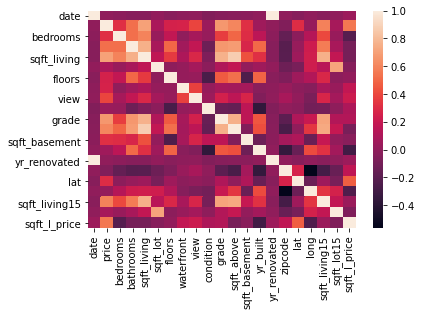

In [6]:
sns.heatmap(df.corr())

In [7]:
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'sqft_l_price'],
      dtype='object')

In [15]:
# feature
X = df[['date', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'sqft_l_price']]

In [16]:
# label
y = df["price"]

## Split data

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=13)

## Building a modell

In [19]:
from sklearn.linear_model import LinearRegression

In [20]:
lm = LinearRegression()

In [21]:
lm.fit(X_train,y_train)

LinearRegression()

In [24]:
lm.intercept_

14699426.737762079

In [23]:
lm.coef_

array([-4.58483099e-02,  1.16308503e+04,  2.42787978e+02, -1.28050659e-01,
       -1.70861296e+04,  2.93984093e+05,  1.35214364e+04,  6.24359817e+03,
        2.02978734e+04,  4.86418409e+01,  4.68982167e+01, -1.97035503e+02,
       -4.58483444e-02, -1.50182254e+02, -5.28502843e+04, -1.81802245e+04,
       -2.57920961e+01, -1.64650454e-01,  2.01467807e+03])

In [25]:
X.columns

Index(['date', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront',
       'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built',
       'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15',
       'sqft_l_price'],
      dtype='object')